### How would the annual performance reports of honey bees compare to the annual reports released by Bumble? What are the relative strengths and weaknesses of each entity and what opportunities and risks should potential stakeholders be aware of? 
#### Key Metrics (annually and 3 year average)
-Revenue  
-Gross Profit Margin  
-Profit Margin  
#### Other Questions
-How would queen bees be compensated if they were paid on similar scale to bumble CEOs?  
-How does each entity diversify revenue streams? What percentage of total revenue does each revenue stream make up?  
-What other vulnerabilities may impact each entity?  

In [2]:
#Library setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')


'en_US.UTF-8'

### Bumble Inc Metrics

In [4]:
#Read in and clean annual report data
bb_op_costs23 = pd.read_csv('../data/bb_op_costs23.csv')
bb_op_costs = bb_op_costs23.rename(columns = {'in_thousands': 'metric_in_thousands', 'ye_2023': '2023', 'ye_2022': '2022', 'ye_2021': '2021'})
bb_op_costs = bb_op_costs.set_index('metric_in_thousands').transpose()
bb_op_costs = bb_op_costs.reset_index()
bb_op_costs = bb_op_costs.reset_index(drop = True).rename(columns={'index': 'Year'})
bb_op_costs['Year'] = bb_op_costs['Year'].astype(int)

bb_rev_streams = pd.read_csv('../data/bumble_rev_streams2023.csv')

exec_comp = pd.read_csv('../data/2223bumble_exec_comp.csv')

##### Revenue

In [6]:
#Format revenue values with locale to remove commas and cast as float
bb_op_costs['Revenue'] = bb_op_costs['Revenue'].astype(str)
rev_list = []
for value in bb_op_costs['Revenue']:
    rev_list.append(locale.atof(value))
bb_op_costs['Revenue'] = rev_list

In [7]:
#Revenue: 3yr Average and Year-over-Year
rev_3yr_avg = bb_op_costs['Revenue'].mean()
rev_yoy = bb_op_costs[['Year','Revenue']]


##### Gross Margin

In [9]:
#Format cost values with locale to remove commas
bb_op_costs['Generalandadministrativeexpense'] = bb_op_costs['Generalandadministrativeexpense'].astype(str)
gae_list = []
for value in bb_op_costs['Generalandadministrativeexpense']:
    gae_list.append(locale.atof(value))
bb_op_costs['Generalandadministrativeexpense'] = gae_list

bb_op_costs['Productdevelopmentexpense'] = bb_op_costs['Productdevelopmentexpense'].astype(str)
pde_list = []
for value in bb_op_costs['Productdevelopmentexpense']:
    pde_list.append(locale.atof(value))
bb_op_costs['Productdevelopmentexpense'] = pde_list

In [10]:
#Calculate Profit and Profit Margin
bb_op_costs['gross_profit_margin'] = ((bb_op_costs['Revenue'] - bb_op_costs['Productdevelopmentexpense'] - bb_op_costs['Generalandadministrativeexpense'])/(bb_op_costs['Revenue']))*100
bumble_profit_yoy = bb_op_costs[['Year','gross_profit_margin']]
bb_op_costs['gross_profit'] = bb_op_costs['Revenue'] - bb_op_costs['Productdevelopmentexpense'] - bb_op_costs['Generalandadministrativeexpense']
bumble_gross_profit_yoy = bb_op_costs[['Year','gross_profit']]

##### Revenue Streams

In [12]:
bb_rev_stream = bb_rev_streams.set_index('Column1').transpose().reset_index().rename(columns = {'index':'year'})
bb_rev_stream.loc['total'] = bb_rev_stream.sum(numeric_only=True, axis=0)
total_bb_rev_stream = bb_rev_stream.loc['total'].reset_index().drop([0,3]).rename(columns = {'Column1': 'Revenue Stream'})
total_bb_rev_stream['total'] = total_bb_rev_stream['total'].astype(float)
total_bb_rev_stream

,Revenue Stream,total
1,BumbleApp,2067688.0
2,BadooAppandOther,648555.0


##### Exec Comp

In [14]:
exec_comp['Salary'] = exec_comp['Salary'].astype(str)
exc_list = []
for value in exec_comp['Salary']:
    exc_list.append(locale.atof(value))
exec_comp['Salary'] = exc_list

avg_salary = exec_comp.groupby('Name and Principal Position')['Salary'].mean().reset_index()
avg_salary['Avg_Revenue'] = rev_3yr_avg
avg_salary['Share_of_Rev'] = avg_salary['Salary']/(avg_salary['Avg_Revenue'])
CFO = avg_salary.loc[avg_salary['Name and Principal Position'] == 'Anuradha B. Subramanian, Chief Financial Officer']['Share_of_Rev']
CEO = avg_salary.loc[avg_salary['Name and Principal Position'] == 'Whitney Wolfe Herd, Executive Chair; Former Chief Executive Officer']['Share_of_Rev']

### Honey Bee Metrics

In [16]:
#Read in and consolidate USDA honey info
honey23 = pd.read_csv('../data/23Nasshoney.csv')
honey22 = pd.read_csv('../data/22Nasshoney.csv')
honey21 = pd.read_csv('../data/21Nasshoney.csv')
honey20 = pd.read_csv('../data/20Nasshoney.csv')

honey = pd.concat([honey20,honey21, honey22, honey23])

inc_exp2223 = pd.read_csv('../data/2223Nass_inc_and_exp.csv')
inc_exp2021 = pd.read_csv('../data/2021inc_exp.csv')
inc_exp2021['Item'] = inc_exp2021['Item'].str.replace(' 1','').str.replace(' 2','').str.replace(' 3','').str.replace('Expenditures\n','').str.strip()
inc_exp2223['Item'] = inc_exp2223['Item'].str.replace(' 1','').str.replace(' 2','').str.replace(' 3','').str.replace('Expenditures\n','').str.strip()
inc_exp2223['Item'] = inc_exp2223['Item'].str.strip()

inc_exp = pd.merge(inc_exp2021,inc_exp2223, how = 'outer', left_on = ['Item','inc_exp'], right_on = ['Item','inc_exp'])
inc_exp

,Item,inc_exp,2020_1000dollars,2021_1000dollars,2022_1000dollars,2023_1000dollars
0,Feed,Expenditure,"40,930","42,582","44,517","46,868"
1,Foundation,Expenditure,"6,567","7,064","6,934","5,753"
2,Hives/woodenware,Expenditure,"11,153","9,863","10,835","10,496"
3,Other colony issues,Expenditure,"3,166","3,066","5,096","4,967"
4,Other income,Income,"55,773","101,688","55,188","57,720"
5,Pollination income,Income,"254,282","268,590","241,042","254,945"
6,Varroa control and treatment,Expenditure,"11,706","11,565","13,724","15,112"


##### Revenue

In [18]:
#Honey Sales Revenue
#Calculate annual honey sales by determing YoY depletion of stockpiles
honey['year_prior'] = honey['year'] - 1
honey_sales = pd.merge(honey, honey, left_on = ['state','year_prior'], right_on = ['state','year'])
honey_sales = honey_sales[['state', 'production_1000lbs_x','stock_1000lbs_x','price_per_lbs_x', 'year_x', 'year_prior_x', 'stock_1000lbs_y']]
honey_sales = honey_sales.rename(columns = { 'production_1000lbs_x': 'production_1000lbs_cy','stock_1000lbs_x':'stock_1000lbs_cy','price_per_lbs_x':'price_per_lbs_cy', 'year_x':'current_year', 'year_prior_x':'year_prior', 'stock_1000lbs_y':'stock_1000lbs_yp'})

In [19]:
#Format production numbers using locale
honey_sales['production_1000lbs_cy'] = honey_sales['production_1000lbs_cy'].astype(str)
pcy_list = []
for value in honey_sales['production_1000lbs_cy']:
    pcy_list.append(locale.atof(value))
honey_sales['production_1000lbs_cy'] = pcy_list

In [20]:
#Format stock numbers (current year) using locale
honey_sales['stock_1000lbs_cy'] = honey_sales['stock_1000lbs_cy'].astype(str)
scy_list = []
for value in honey_sales['stock_1000lbs_cy']:
    scy_list.append(locale.atof(value))
honey_sales['stock_1000lbs_cy'] = scy_list

In [21]:
#Format stock numbers (prior year) using locale
honey_sales['stock_1000lbs_yp'] = honey_sales['stock_1000lbs_yp'].astype(str)
spy_list = []
for value in honey_sales['stock_1000lbs_yp']:
    spy_list.append(locale.atof(value))
honey_sales['stock_1000lbs_yp'] = spy_list

In [22]:
#Calculate annual sales (in 1000 pounds and in 1000 dollars)
honey_sales['sales_1000lbs'] = (honey_sales['stock_1000lbs_yp'] + honey_sales['production_1000lbs_cy'] - honey_sales['stock_1000lbs_cy'])
honey_sales['sales_1000dollars'] = honey_sales['sales_1000lbs'] * honey_sales['price_per_lbs_cy']

In [23]:
#Honey sales revenue: 3yr Average and YoY
honey_rev_3_yr_avg = honey_sales.loc[honey_sales['state'] == 'United States 6 7']['sales_1000dollars'].mean()
honey_rev_yoy = honey_sales.loc[honey_sales['state'] == 'United States 6 7'][['current_year','sales_1000dollars']]

In [24]:
#Other Revenue plus expenses

In [25]:
#format income and expendiyure numbers using locale
inc_exp['2021_1000dollars'] = inc_exp['2021_1000dollars'].astype(str)
ie21_list = []
for value in inc_exp['2021_1000dollars']:
    ie21_list.append(locale.atof(value))
inc_exp['2021_1000dollars'] = ie21_list

inc_exp['2022_1000dollars'] = inc_exp['2022_1000dollars'].astype(str)
ie22_list = []
for value in inc_exp['2022_1000dollars']:
    ie22_list.append(locale.atof(value))
inc_exp['2022_1000dollars'] = ie22_list

inc_exp['2023_1000dollars'] = inc_exp['2023_1000dollars'].astype(str)
ie23_list = []
for value in inc_exp['2023_1000dollars']:
    ie23_list.append(locale.atof(value))
inc_exp['2023_1000dollars'] = ie23_list

In [26]:
#rearrange income and expenditure table so it can be joined with revenue table
inc_exp_grped = inc_exp[['inc_exp','2021_1000dollars','2022_1000dollars', '2023_1000dollars']]
inc_exp_grped = inc_exp_grped.groupby('inc_exp').sum().transpose().reset_index().rename(columns = {'index': 'year', 'Expenditure': 'exp_1000dollars', 'Income': 'other_income_1000dollars'})
inc_exp_grped['year'] = inc_exp_grped['year'].str[0:4].astype(int)
inc_exp_grped

inc_exp,year,exp_1000dollars,other_income_1000dollars
0,2021,74140.0,370278.0
1,2022,81106.0,296230.0
2,2023,83196.0,312665.0


In [27]:
#merge revenue table with income and expenditure table
all_rev_exp = pd.merge(honey_rev_yoy, inc_exp_grped, left_on = 'current_year', right_on = 'year')
all_rev_exp = all_rev_exp[['year', 'sales_1000dollars', 'other_income_1000dollars','exp_1000dollars']]

In [28]:
# Total Revenue
all_rev_exp ['total_revenue'] = all_rev_exp['sales_1000dollars'] + all_rev_exp['other_income_1000dollars']
bee_total_rev_3yr = all_rev_exp['total_revenue'].mean()
bee_total_rev_yoy = all_rev_exp[['year','total_revenue']]
bee_total_rev_yoy

,year,total_revenue
0,2021,732619.16
1,2022,674517.77
2,2023,609359.72


##### Gross Profit Margin


In [30]:
#Gross Profit
all_rev_exp['gross_profit'] = all_rev_exp['sales_1000dollars'] + all_rev_exp['other_income_1000dollars'] - all_rev_exp['exp_1000dollars']
bee_gross_profit_yoy = all_rev_exp[['year','gross_profit']]

In [31]:
#Gross Profit Margin
all_rev_exp['profit_margin'] = (all_rev_exp['gross_profit']/all_rev_exp['total_revenue'])*100
bee_profit_3yr_avg = (all_rev_exp['gross_profit'].sum())/(all_rev_exp['total_revenue'].sum())
bee_profit_yoy = all_rev_exp[['year','profit_margin']]

##### Revenue Streams

In [33]:
all_rev_exp.loc['sum'] = all_rev_exp.sum()
bee_rev_streams = all_rev_exp[['sales_1000dollars','other_income_1000dollars']].loc['sum'].reset_index().rename(columns = {'index': 'Revenue Stream'})

##### Risk : Honey Costs Over Time

In [35]:
honey_sales.loc[honey_sales['state'] == 'United States 6 7']

,state,production_1000lbs_cy,stock_1000lbs_cy,price_per_lbs_cy,current_year,year_prior,stock_1000lbs_yp,sales_1000lbs,sales_1000dollars
41,United States 6 7,126466.0,23527.0,2.54,2021,2020,39715.0,142654.0,362341.16
82,United States 6 7,125331.0,23181.0,3.01,2022,2021,23527.0,125677.0,378287.77
123,United States 6 7,138571.0,44016.0,2.52,2023,2022,23181.0,117736.0,296694.72


##### Risk: Colony Loss

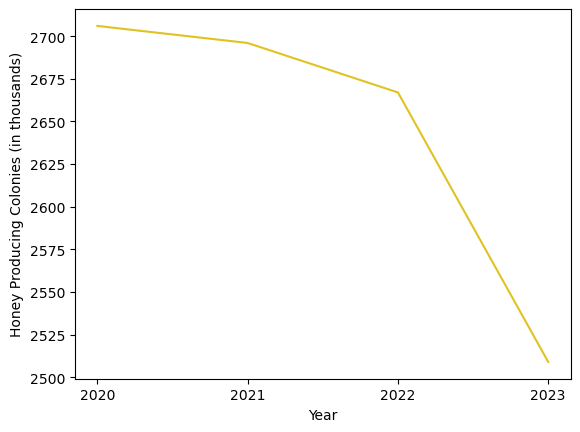

In [37]:
sns.lineplot(data = honey.loc[honey['state'] == "United States 6 7"], x = 'year', y = 'honey_producing_colonies_1000s', color = "#E1C223")
plt.xticks([2020,2021,2022,2023])
plt.ylabel("Honey Producing Colonies (in thousands)")
plt.xlabel('Year');

### Comparison Analysis

C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\2453916402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_total_rev_yoy_concat['Entity'] = 'Bees'


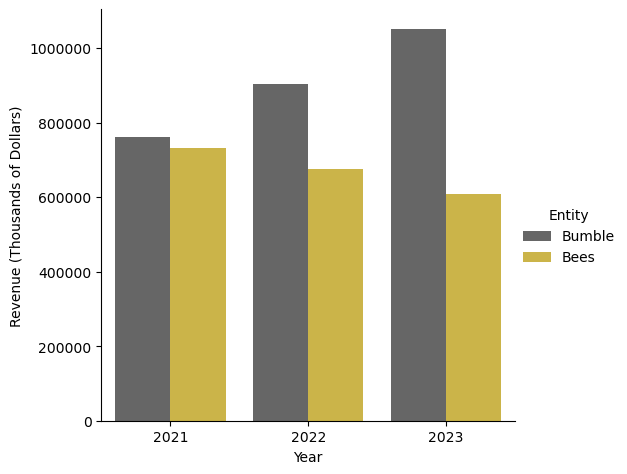

In [39]:
#### YoY Revenue
rev_yoy_concat = rev_yoy.rename(columns = {'Year':'year','Revenue':'total_revenue'})
rev_yoy_concat['Entity'] = 'Bumble'
bee_total_rev_yoy_concat = bee_total_rev_yoy
bee_total_rev_yoy_concat['Entity'] = 'Bees'
rev_catplot = pd.concat([rev_yoy_concat, bee_total_rev_yoy])

custom_palette = sns.color_palette(["#666666","#E1C233"])
sns.catplot(kind = 'bar',data = rev_catplot, x = 'year', y = 'total_revenue', hue = 'Entity', palette=custom_palette )
plt.ylabel('Revenue (Thousands of Dollars)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Year');

Text(0, 0.5, 'Revenue (Thousands of Dollars)')

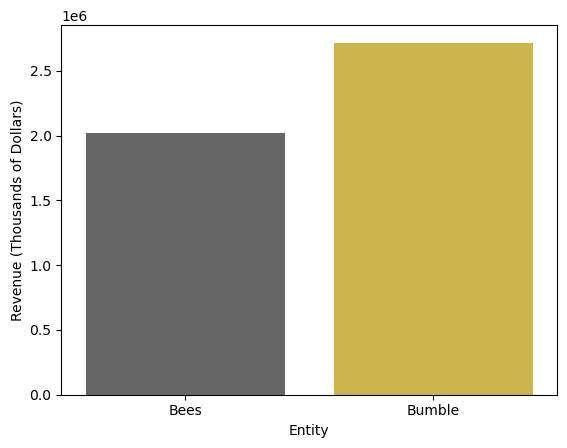

In [40]:
### Total Revenue
tr_catplot = rev_catplot.groupby('Entity')['total_revenue'].sum().reset_index()
sns.barplot(data = tr_catplot, x = 'Entity', y = 'total_revenue', hue = 'Entity', palette=custom_palette)
plt.ylabel('Revenue (Thousands of Dollars)')


In [41]:
#### YoY Profit Margin

C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\1612336916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bumble_gross_profit_yoy['Entity'] = 'Bumble Inc'
C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\1612336916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bee_gross_profit_yoy['Entity'] = 'Bees'
C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\1612336916.py:9: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.catplot(kind = 'bar',data = pr

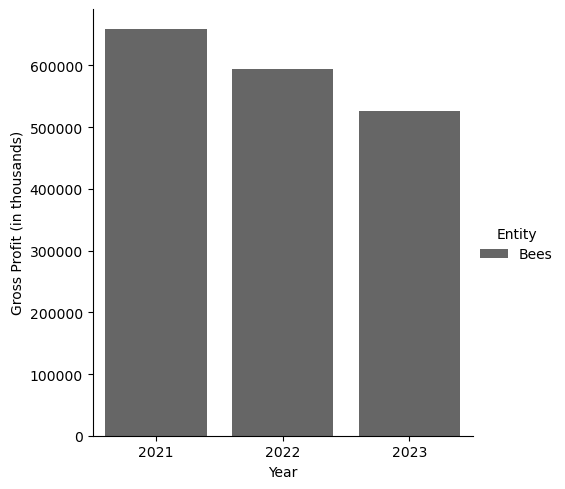

In [42]:
### Gross Profit
bumble_gross_profit_yoy_concat = bumble_gross_profit_yoy.rename(columns = {'Year' : 'year'})
bumble_gross_profit_yoy['Entity'] = 'Bumble Inc'
bee_gross_profit_yoy['Entity'] = 'Bees'
profit_amt_catplot = pd.concat([bumble_gross_profit_yoy_concat, bee_gross_profit_yoy])
profit_amt_catplot['gross_profit'] = profit_amt_catplot['gross_profit'].round(0)


sns.catplot(kind = 'bar',data = profit_amt_catplot, x = 'year', y = 'gross_profit', hue = 'Entity', palette=custom_palette)
plt.ylabel ('Gross Profit (in thousands)')
plt.xlabel('Year');


C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\3808062549.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data = profit_amt_catplot, x = 'Entity', y = 'gross_profit', hue = 'Entity', errwidth=0, palette=custom_palette)
C:\Users\Owner\AppData\Local\Temp\ipykernel_14668\3808062549.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data = profit_amt_catplot, x = 'Entity', y = 'gross_profit', hue = 'Entity', errwidth=0, palette=custom_palette)


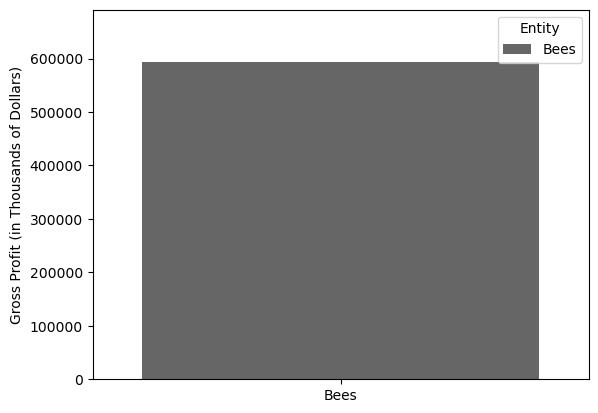

In [43]:
sns.barplot(data = profit_amt_catplot, x = 'Entity', y = 'gross_profit', hue = 'Entity', errwidth=0, palette=custom_palette)
plt.ylabel ('Gross Profit (in Thousands of Dollars)')
plt.xlabel('');


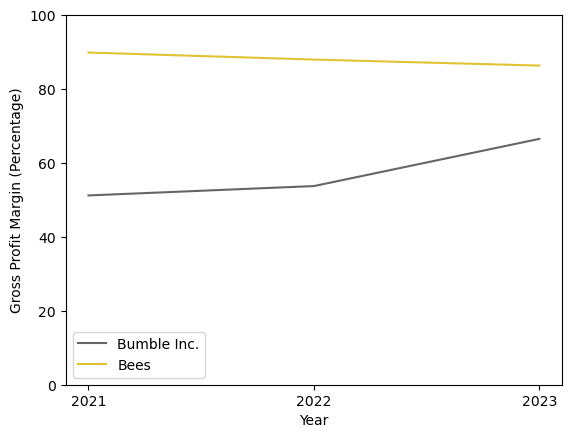

In [44]:
profit_comparison = pd.merge(bee_profit_yoy, bumble_profit_yoy, left_on = 'year', right_on = 'Year')
profit_comparison
sns.lineplot(data=bumble_profit_yoy, x='Year', y='gross_profit_margin', label='Bumble Inc.', color = "#666666")
sns.lineplot(data=bee_profit_yoy, x='year', y='profit_margin', label='Bees', color = "#E1C233")
plt.xticks(bee_profit_yoy['year'])
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin (Percentage)')
plt.ylim(0, 100);

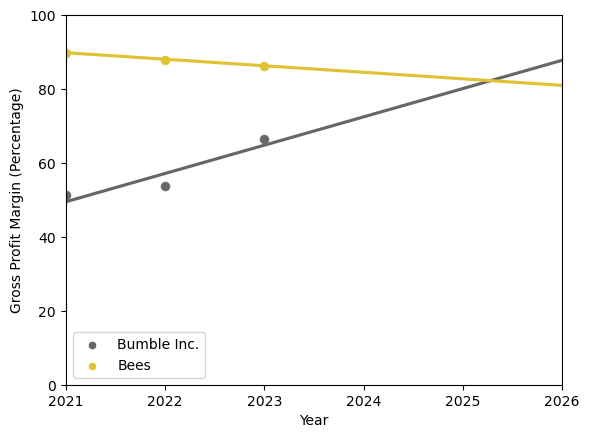

In [45]:
sns.scatterplot(data=bumble_profit_yoy, x='Year', y='gross_profit_margin', label='Bumble Inc.', color = "#666666")
plt.xlim(2021, 2026)
sns.regplot(data=bumble_profit_yoy, x='Year', y='gross_profit_margin', truncate = False, ci=None, color = "#666666")
sns.scatterplot(data=bee_profit_yoy, x='year', y='profit_margin', label='Bees', color = "#E1C233")
sns.regplot(data=bee_profit_yoy, x='year', y='profit_margin', truncate = False, ci=None, color = "#E1C233")
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin (Percentage)')
plt.ylim(0, 100);


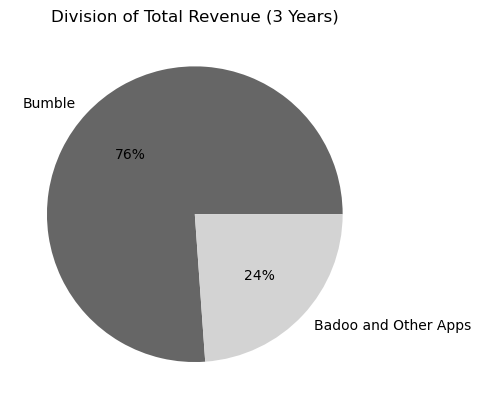

In [46]:
plt.pie(data = total_bb_rev_stream, x = 'total', autopct='%1.0f%%', labels = ['Bumble', 'Badoo and Other Apps'], colors = ['#666666','lightgray'])
plt.title('Division of Total Revenue (3 Years)');

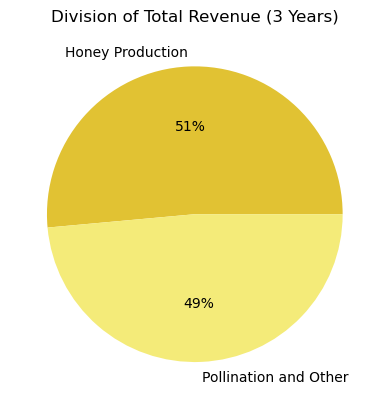

In [47]:
plt.pie(data = bee_rev_streams, x = 'sum', autopct='%1.0f%%', labels = ['Honey Production', 'Pollination and Other'], colors = ["#E1C233",'#F4EB79'])
plt.title('Division of Total Revenue (3 Years)');

In [48]:
#Bee CEO and CFO Salaries
bee_ceo = bee_total_rev_3yr * CEO
bee_cfo = bee_total_rev_3yr * CFO
bee_ceo

3    482549.912692
Name: Share_of_Rev, dtype: float64

In [49]:
#Number of Queen CEOs
avg_colonies_per_year = honey.loc[honey['state'] == 'United States 6 7']
avg_colonies_per_year = avg_colonies_per_year.groupby('year')['honey_producing_colonies_1000s'].sum().reset_index().drop([0])
avg_colonies_per_year = avg_colonies_per_year['honey_producing_colonies_1000s'].mean()

In [50]:
#Salary Per Queen
shared_ceo_salary = bee_ceo/(avg_colonies_per_year *1000)
shared_ceo_salary

3    0.183899
Name: Share_of_Rev, dtype: float64

In [51]:
#Actual Queen Value (according to USDA)
queenbee_avg_lifetime_value = 20
queenbee_avg_working_years = 2
queen_cost_per_year = queenbee_avg_lifetime_value / queenbee_avg_working_years

#Salary as share of revenue produced
(queen_cost_per_year*avg_colonies_per_year*1000)/(bee_total_rev_3yr*1000)


0.039038001873199245